# 1. Importing the libraries

In [249]:
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Preprocessing and metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (classification_report, 
                             confusion_matrix, 
                             f1_score, 
                             RocCurveDisplay, 
                             roc_curve, 
                             auc)
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.decomposition import PCA

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.base import BaseEstimator

# Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 2. Reading datasets

In [56]:
data = pd.read_csv('traindata.csv', index_col=0)

benchmark = pd.read_csv('testdata.csv', index_col=0)

# 3. EDA

In [41]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
ID,,,,,,,,,,,,,,,,,,,,,
0,0,tcp,http,SF,295,2584,0,0,0,0,...,1.00,0.00,0.01,0.03,0.0,0.0,0.00,0.01,21,0
1,0,tcp,http,SF,312,839,0,0,0,0,...,1.00,0.00,0.00,0.02,0.0,0.0,0.01,0.01,21,0
2,0,tcp,ftp,SF,1225,2451,0,0,0,28,...,0.45,0.02,0.00,0.00,0.0,0.0,0.00,0.00,11,1
3,0,tcp,http,SF,293,296,0,0,0,0,...,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.02,21,0
4,0,tcp,X11,REJ,0,0,0,0,0,0,...,0.01,0.03,0.01,0.00,0.0,0.0,0.01,1.00,11,0


In [42]:
benchmark.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
ID,,,,,,,,,,,,,,,,,,,,,
0,4,tcp,pop_3,SF,30,93,0,0,0,0,...,232,0.91,0.04,0.00,0.00,0.0,0.0,0.0,0.0,16
1,0,tcp,private,S0,0,0,0,0,0,0,...,5,0.02,0.08,0.00,0.00,1.0,1.0,0.0,0.0,21
2,0,udp,private,SF,52,54,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,17
3,0,tcp,http,SF,367,588,0,0,0,0,...,255,1.00,0.00,0.12,0.06,0.0,0.0,0.0,0.0,21
4,0,icmp,ecr_i,SF,1008,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,18


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23002 entries, 0 to 23001
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     23002 non-null  int64  
 1   protocol_type                23002 non-null  object 
 2   service                      23002 non-null  object 
 3   flag                         23002 non-null  object 
 4   src_bytes                    23002 non-null  int64  
 5   dst_bytes                    23002 non-null  int64  
 6   land                         23002 non-null  int64  
 7   wrong_fragment               23002 non-null  int64  
 8   urgent                       23002 non-null  int64  
 9   hot                          23002 non-null  int64  
 10  num_failed_logins            23002 non-null  int64  
 11  logged_in                    23002 non-null  int64  
 12  num_compromised              23002 non-null  int64  
 13  root_shell      

In [44]:
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22501 entries, 0 to 22500
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22501 non-null  int64  
 1   protocol_type                22501 non-null  object 
 2   service                      22501 non-null  object 
 3   flag                         22501 non-null  object 
 4   src_bytes                    22501 non-null  int64  
 5   dst_bytes                    22501 non-null  int64  
 6   land                         22501 non-null  int64  
 7   wrong_fragment               22501 non-null  int64  
 8   urgent                       22501 non-null  int64  
 9   hot                          22501 non-null  int64  
 10  num_failed_logins            22501 non-null  int64  
 11  logged_in                    22501 non-null  int64  
 12  num_compromised              22501 non-null  int64  
 13  root_shell      

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,23002.0,307.196896,2.697346e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,23002.0,25889.549561,2.522555e+06,0.0,0.00,44.00,274.75,381709090.0
dst_bytes,23002.0,3588.139423,9.231127e+04,0.0,0.00,0.00,486.00,5151385.0
land,23002.0,0.000087,9.324440e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,23002.0,0.024259,2.627939e-01,0.0,0.00,0.00,0.00,3.0
urgent,23002.0,0.000043,6.593518e-03,0.0,0.00,0.00,0.00,1.0
hot,23002.0,0.199113,2.167079e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,23002.0,0.001174,4.614070e-02,0.0,0.00,0.00,0.00,4.0
logged_in,23002.0,0.386532,4.869653e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,23002.0,0.231241,1.077867e+01,0.0,0.00,0.00,0.00,884.0


In [9]:
benchmark.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,22501.0,218.842274,1407.496110,0.0,0.00,0.00,0.00,57715.0
src_bytes,22501.0,10384.041598,473230.577154,0.0,0.00,54.00,287.00,62825648.0
dst_bytes,22501.0,2058.247278,21239.353852,0.0,0.00,46.00,602.00,1345927.0
land,22501.0,0.000311,0.017636,0.0,0.00,0.00,0.00,1.0
wrong_fragment,22501.0,0.008444,0.142735,0.0,0.00,0.00,0.00,3.0
urgent,22501.0,0.000711,0.036508,0.0,0.00,0.00,0.00,3.0
hot,22501.0,0.105418,0.929132,0.0,0.00,0.00,0.00,101.0
num_failed_logins,22501.0,0.021555,0.150044,0.0,0.00,0.00,0.00,4.0
logged_in,22501.0,0.442247,0.496664,0.0,0.00,0.00,1.00,1.0
num_compromised,22501.0,0.120084,7.276536,0.0,0.00,0.00,0.00,796.0


In [10]:
data.nunique()

duration                        702
protocol_type                     3
service                          66
flag                             11
src_bytes                      1578
dst_bytes                      3657
land                              2
wrong_fragment                    3
urgent                            2
hot                              20
num_failed_logins                 5
logged_in                         2
num_compromised                  26
root_shell                        2
su_attempted                      3
num_root                         25
num_file_creations               20
num_shells                        2
num_access_files                  7
num_outbound_cmds                 1
is_host_login                     1
is_guest_login                    2
count                           461
srv_count                       408
serror_rate                      70
srv_serror_rate                  52
rerror_rate                      71
srv_rerror_rate             

In [11]:
data.duplicated().sum()

0

No duplicates found in the dataset

In [12]:
benchmark.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1145
dst_bytes                      3645
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           494
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [13]:
benchmark.is_host_login.value_counts()

0    22490
1       11
Name: is_host_login, dtype: int64

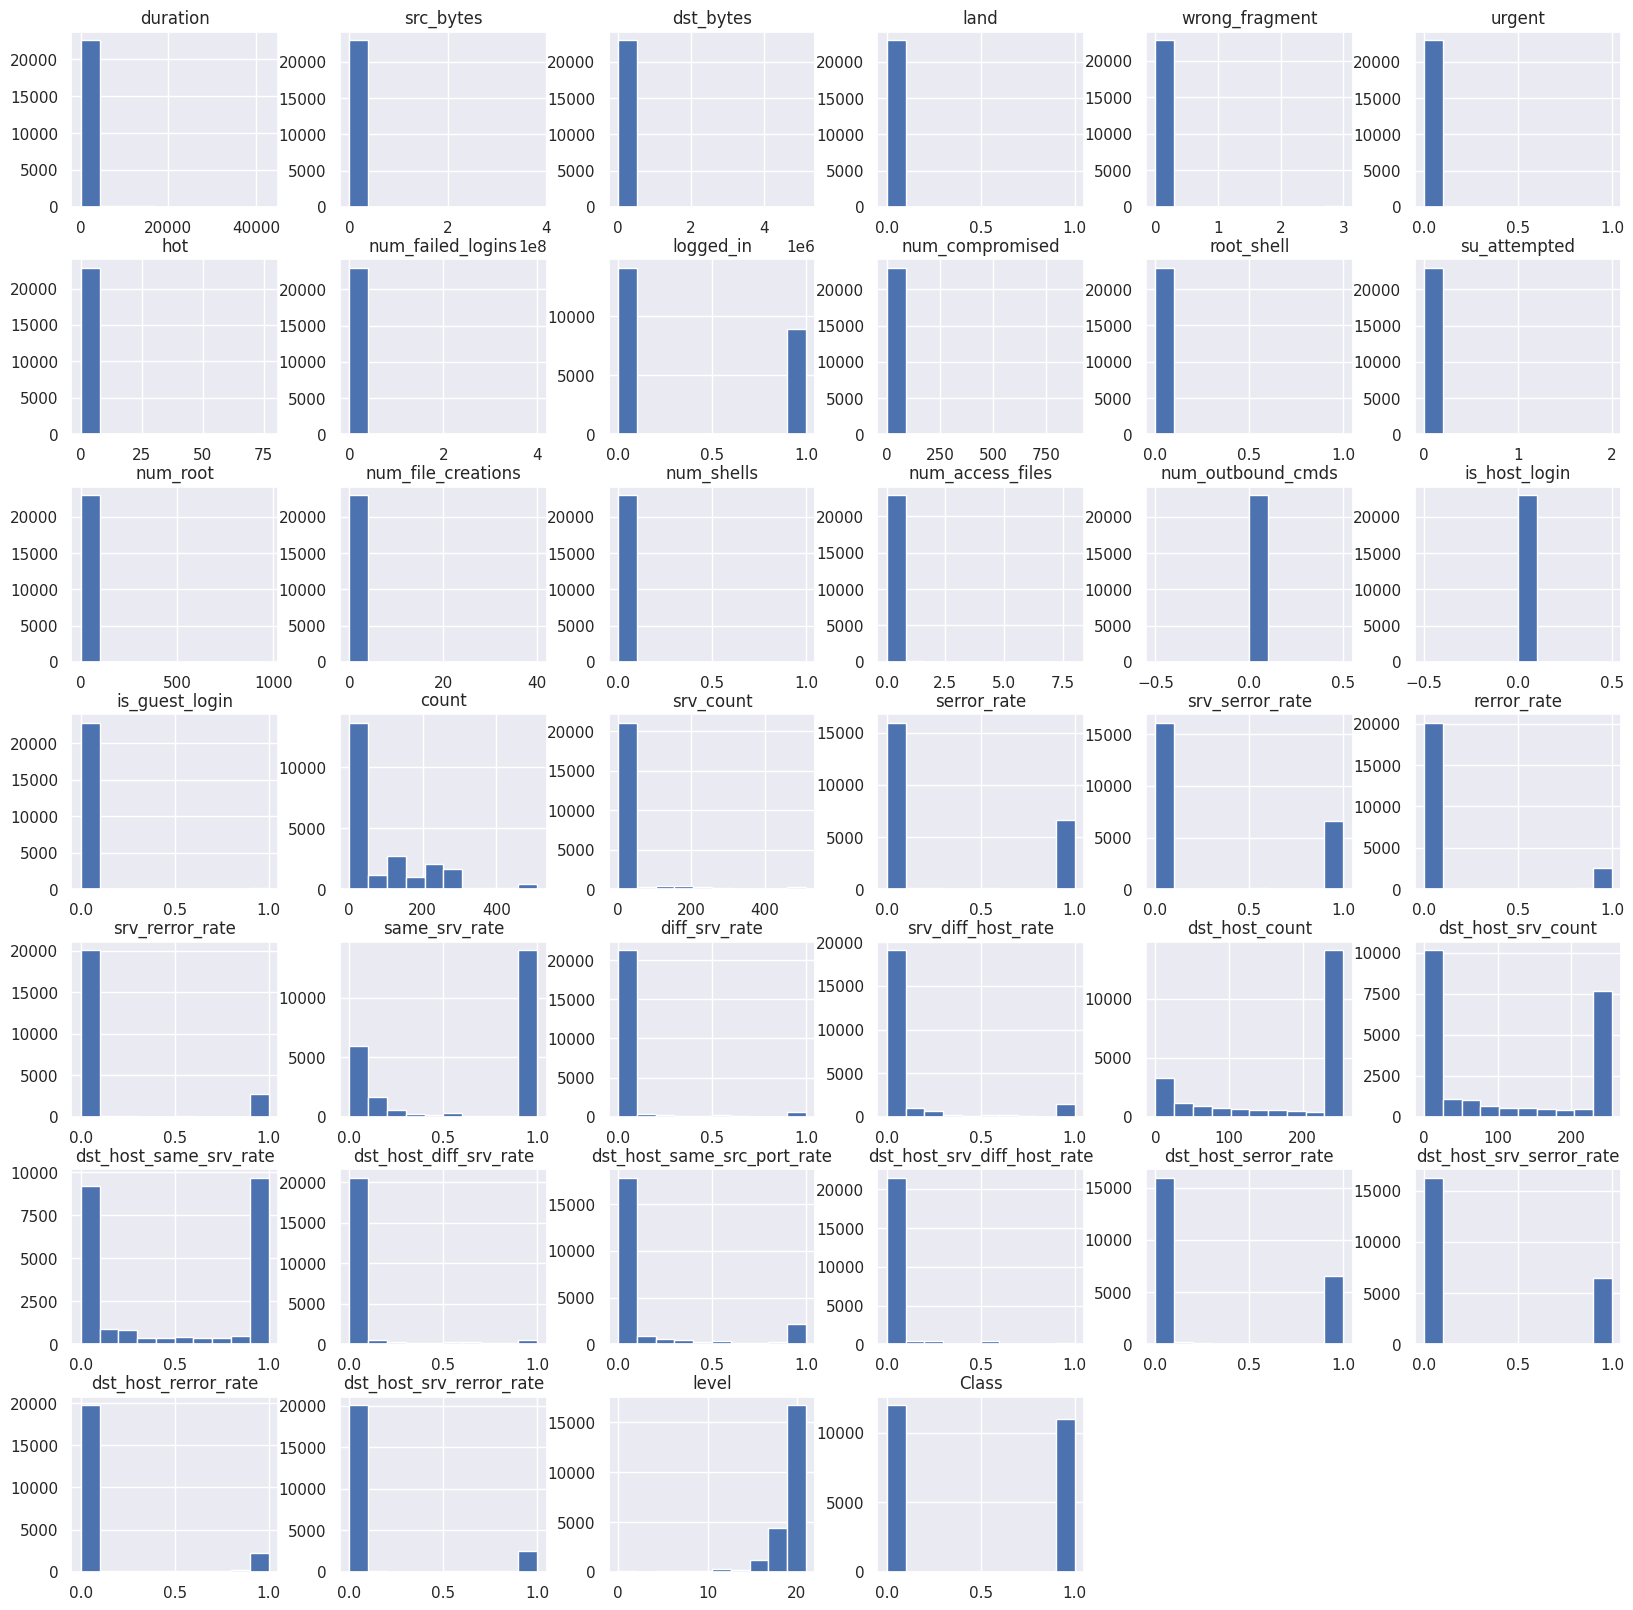

In [9]:
# Draw the histogram of every feature
data.hist(figsize=(20, 20))
plt.show()

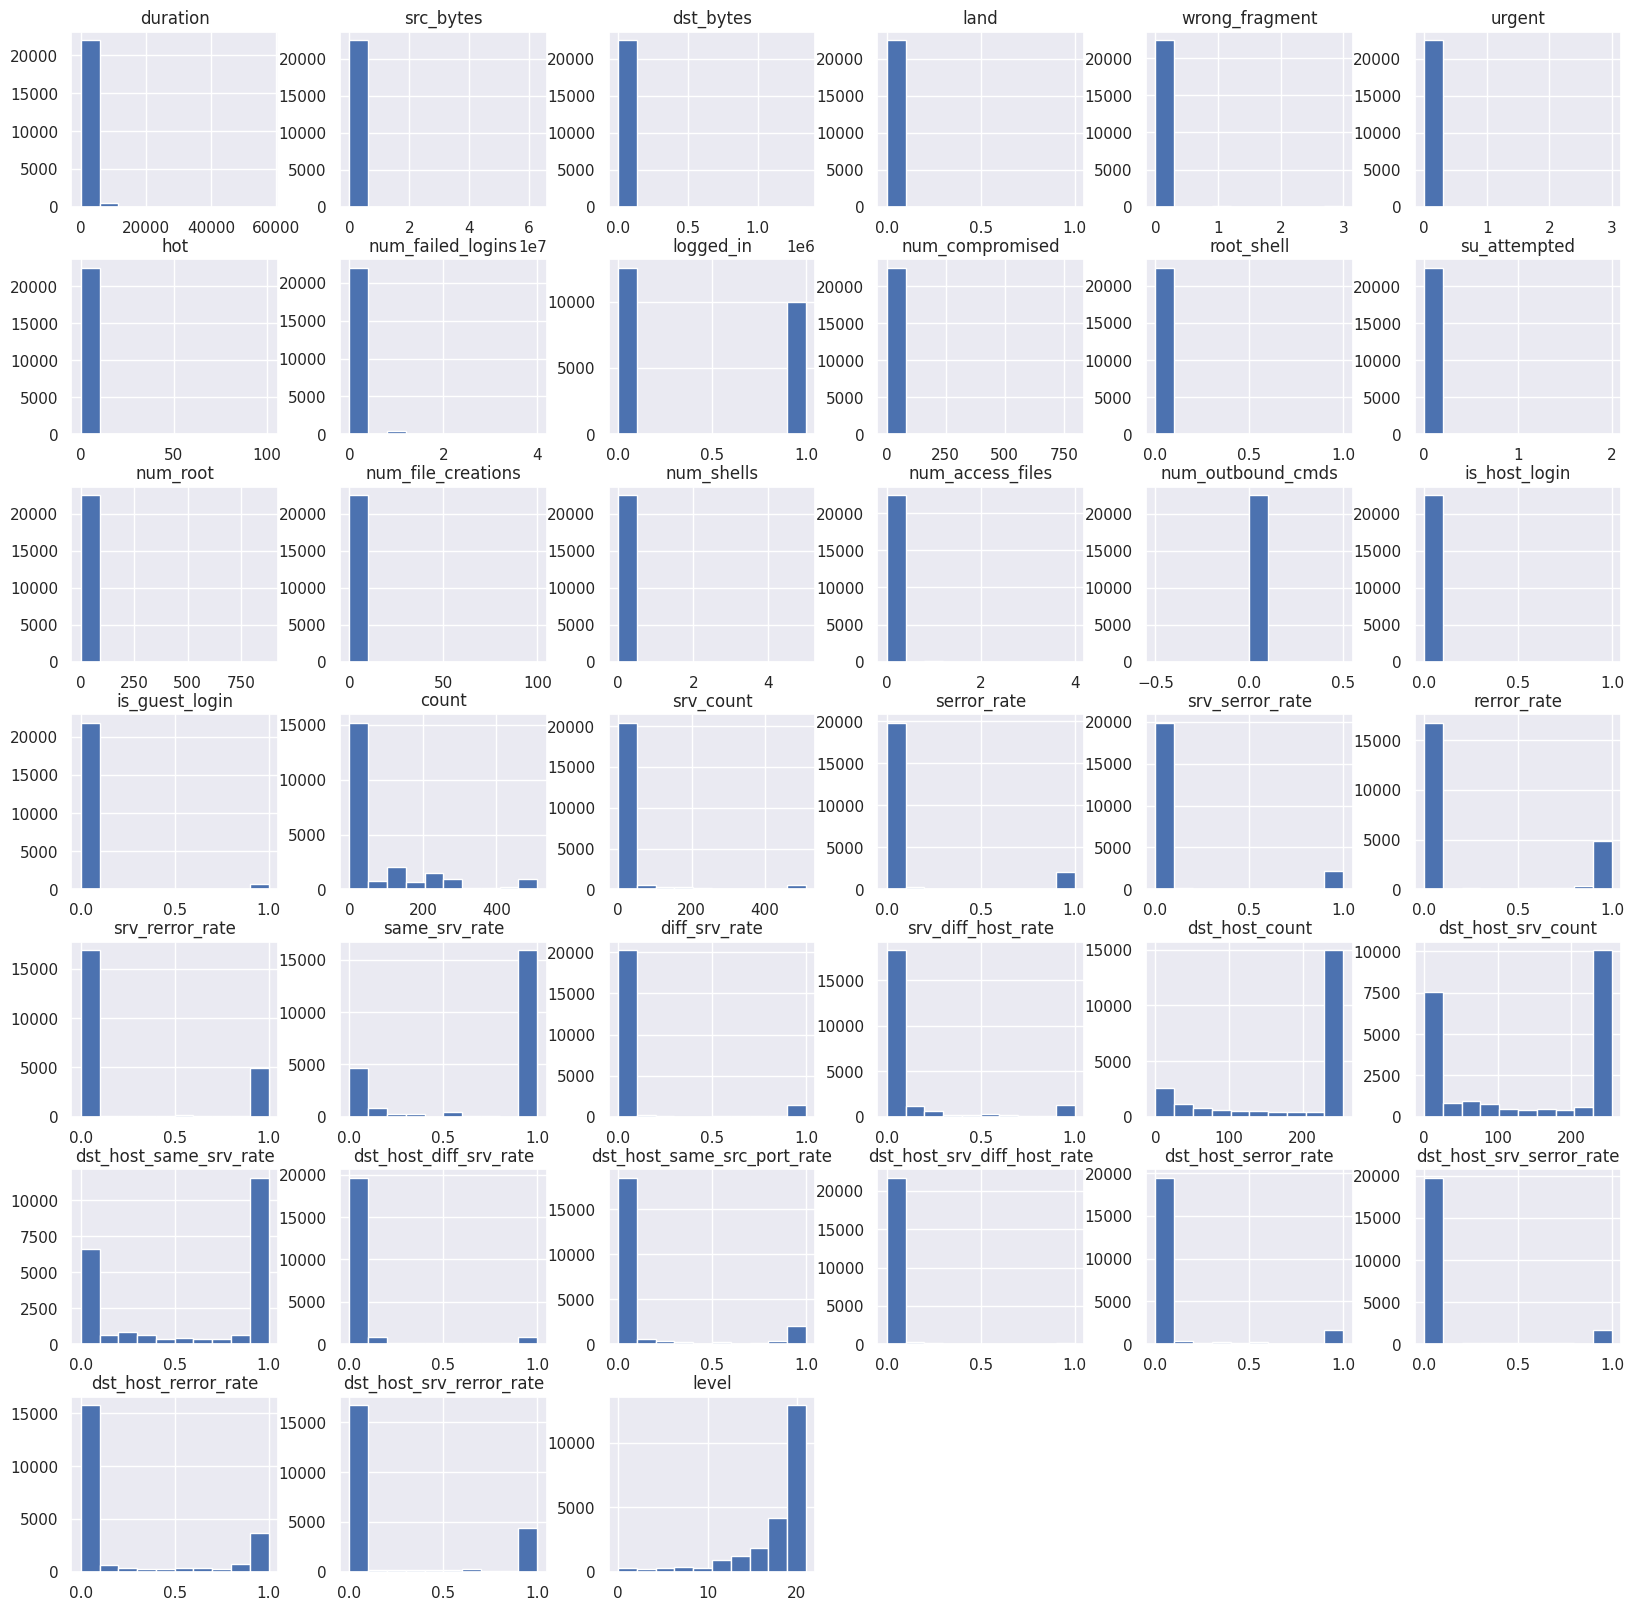

In [10]:
# Drawing the histogram of every feature for the benchmark data
benchmark.hist(figsize=(20, 20))
plt.show()

In [54]:
data.land.value_counts(dropna=False)

0    23000
1        2
Name: land, dtype: int64

The columns is_guest_login, level, dst_host_rerror_rate, is_host_login seems a bit different in both the datasets.

The columns is_guest_login, is_host_login, logged_in, root_shell and land are categorical columns.

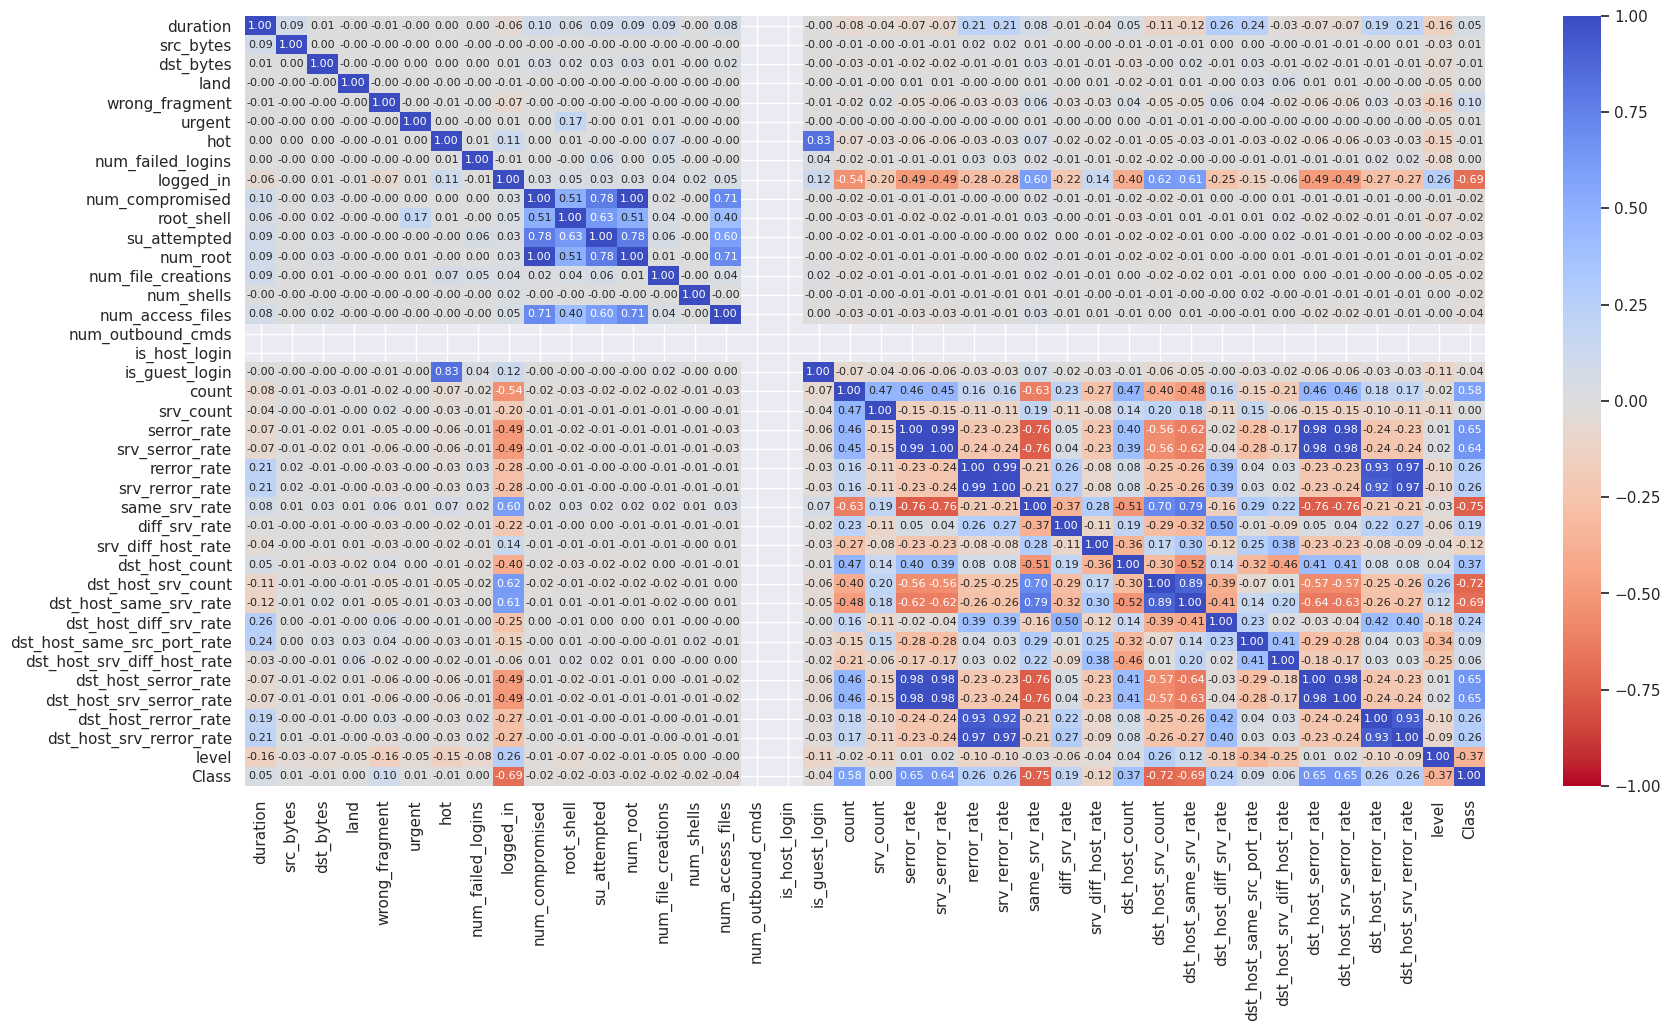

In [115]:
# Draw the correlation matrix
corr = data.corr(numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(corr,
            cmap='coolwarm_r', 
            vmax=1.0, 
            vmin=-1.0, 
            annot=True, 
            annot_kws={'size': 8}, 
            fmt='.2f')
plt.show()

Some features seem to only have a value of zero. Low varicance features are not useful for classification. I'll drop these columns later on.

In [7]:
def plot_stacked_bar(df, column, target="Class", figsize=(10, 5)):
    """
    Plots a stacked bar chart of the column vs the target variable
    
    Parameters
    ----------
    data: DataFrame
        The dataframe to plot
    column: str
        The column to plot
    target: str
        The target variable
    """
    (
    df
    .groupby([column, target])
    .count()
    .pivot_table(index=column, columns=target, values="hot")
    .plot(kind='bar', stacked=True, color=['blue', 'red'], figsize=figsize)
    )
    plt.show()

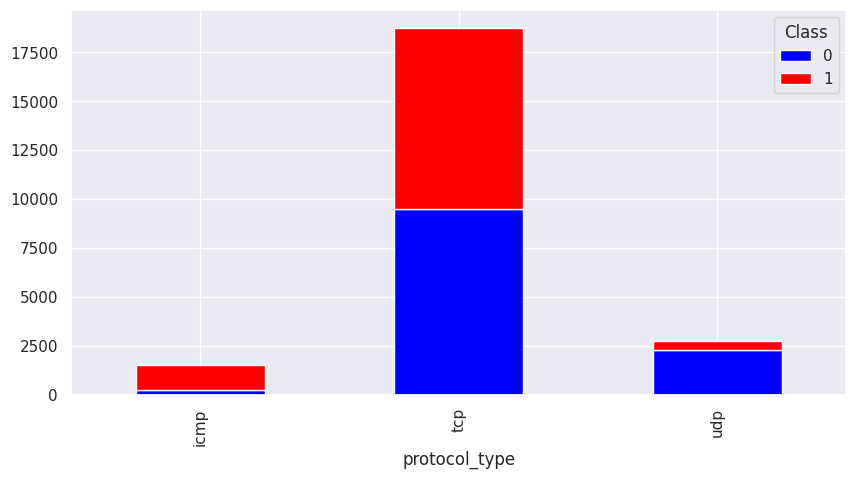

In [8]:
# Draw a stacked bar chart of protocol_type vs Class
plot_stacked_bar(data, 'protocol_type')

UDP traffic seems to be benign for nost cases and ICMP seems to be the opposite.

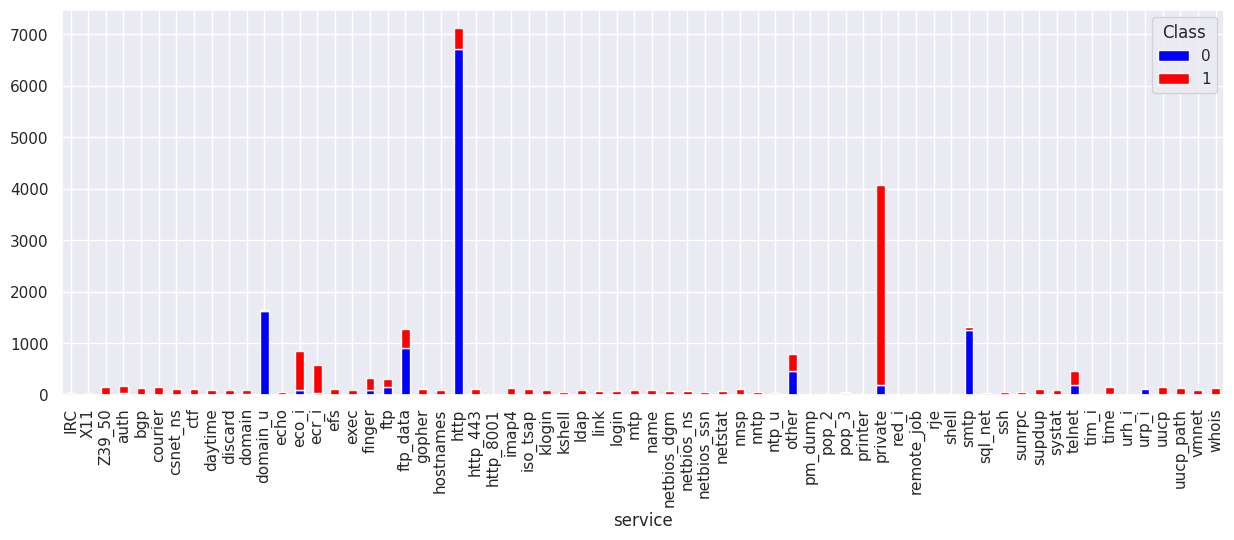

In [12]:
# Draw a stacked bar chart of service vs Class
plot_stacked_bar(data, 'service', figsize=(15, 5))

If the service is not http, domain_u, urp_i or smtp there's a higher chance that it will be an attack.

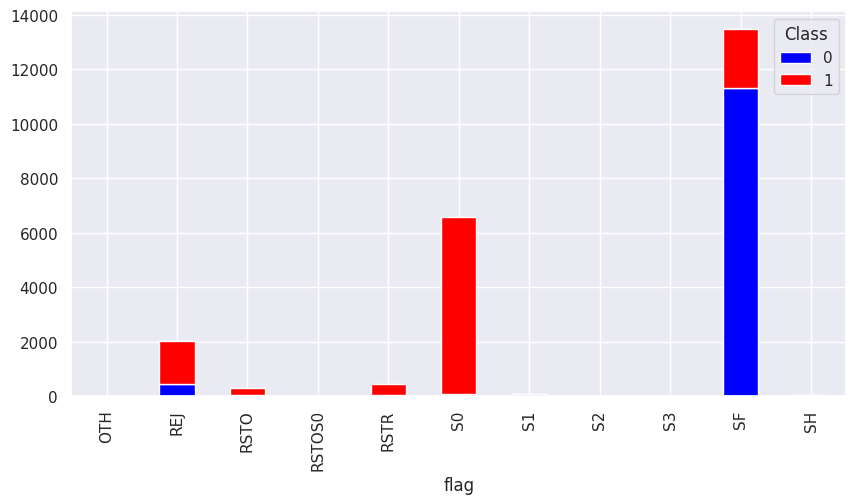

In [13]:
# Draw a stacked bar chart of flag vs Class
plot_stacked_bar(data, 'flag')

If the flag is not SF there's a higher chance that it will be an attack.

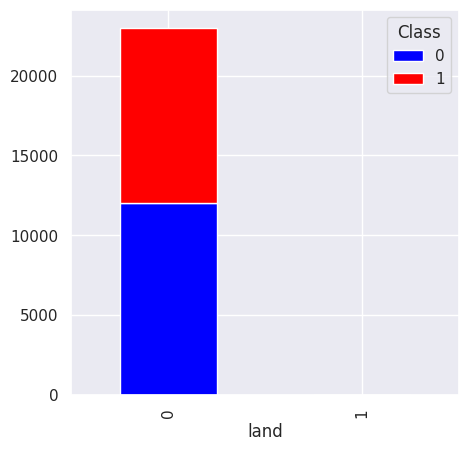

In [153]:
# Draw a stacked bar chart of land vs Class
plot_stacked_bar(data, 'land', figsize=(5, 5))

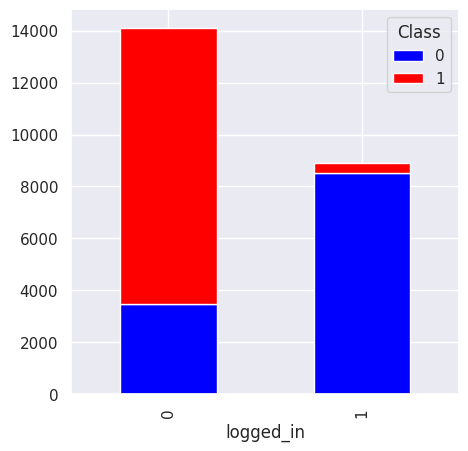

In [152]:
# Draw a stacked bar chart of logged_in vs Class
plot_stacked_bar(data, 'logged_in', figsize=(5, 5))

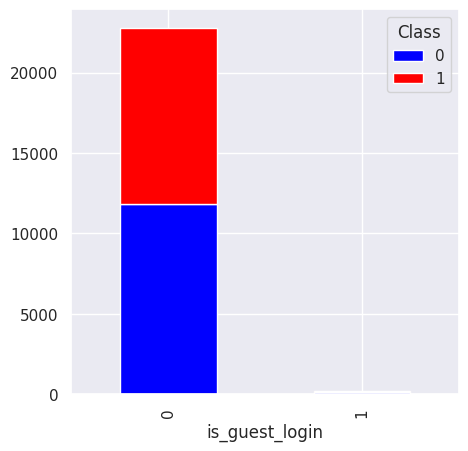

In [151]:
# Draw a stacked bar chart of is_guest_login vs Class
plot_stacked_bar(data, 'is_guest_login', figsize=(5, 5))

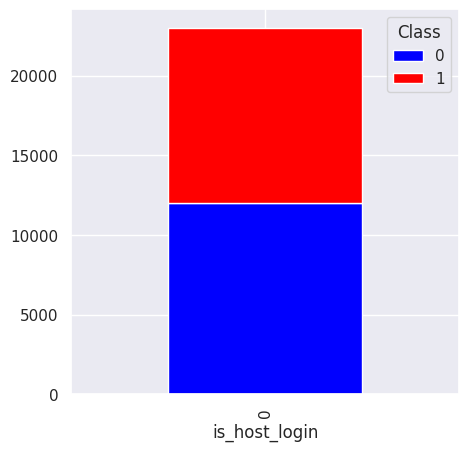

In [150]:
# Draw a stacked bar chart of is_host_login vs Class
plot_stacked_bar(data, 'is_host_login', figsize=(5, 5))

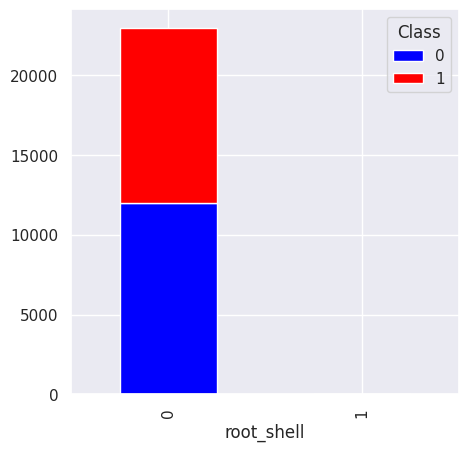

In [157]:
# Draw a stacked bar chart of root_shell vs Class
plot_stacked_bar(data, 'root_shell', figsize=(5, 5))

# 4. Data preprocessing

In [14]:
# class Binarizer(BaseEstimator):
#     """
#     Encode categorical columns into binary columns

#     Parameters
#     ----------

#     df: pd.DataFrame
#         Dataframe to encode
#     column: dict(str, list(str))
#         Column name to encode, and the values to encode as 0
#     """

#     def __init__(self, columns):
#         self.columns = columns
#         for column, zero_value in self.columns.items():
#             if len(zero_value) == 0:
#                 raise ValueError(f'Column {column} has no values to encode as 0')       


#     def fit(self, X:pd.DataFrame, y=None):
#         for column in self.columns.keys():
#             X[column] = X[column].astype('category')
#             if len(X[column].cat.categories) == 2:
#                 raise ValueError(f'Column {column} has only 2 categories') 
#         return self

#     def transform(self, X:pd.DataFrame):
#         for column, zero_value in self.columns.items():
#             X[column] = X[column].apply(lambda x: 0 if x in zero_value else 1)
#         return X
    
#     def fit_transform(self, X:pd.DataFrame, y=None):
#         return self.fit(X).transform(X)


In [15]:
# class OneHotEncoder(BaseEstimator):
#     """
#     Encode categorical columns into one-hot columns

#     Parameters
#     ----------

#     df: pd.DataFrame
#         Dataframe to encode
#     columns: list(str)
#         Column name to encode
#     """

#     def __init__(self, drop_first=False):
#         self.drop_first = drop_first

#     def fit(self, X:pd.DataFrame, y=None):
#         return self

#     def transform(self, X:pd.DataFrame, y=None):
#         return pd.get_dummies(X, drop_first=self.drop_first)
    
#     def fit_transform(self, X:pd.DataFrame, y=None):
#         return self.fit(X).transform(X)
    

In [11]:
def fix_types(df, cat_cols, num_cols):
    """
    Fix the types of the columns

    Parameters
    ----------

    df: pd.DataFrame
        Dataframe to fix
    cat_cols: list(str)
        Categorical columns
    num_cols: list(str)
        Numerical columns
    """
    df[cat_cols] = df[cat_cols].astype('category')
    df[num_cols] = df[num_cols].astype('float64')
    return df

In [12]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level', 'Class'],
      dtype='object')

In [91]:
def process_data(data, benchmark, cat_cols=None, num_cols=None, process_cat=False):
# Creating the pipiline
    protocols = set(data.protocol_type.unique()).union(benchmark.protocol_type.unique())
    services = set(data.service.unique()).union(benchmark.service.unique())
    flags = set(data.flag.unique()).union(benchmark.flag.unique())


    cat_cols = ['is_guest_login', 
                'is_host_login', 
                'logged_in', 
                'root_shell', 
                'land', 
                'protocol_type', 
                'service', 
                'flag']

    num_cols = ['duration',
                'level', 
                'src_bytes', 
                'dst_bytes', 
                'wrong_fragment', 
                'urgent', 
                'hot', 
                'num_failed_logins', 
                'num_compromised', 
                'su_attempted', 
                'num_root', 
                'num_file_creations', 
                'num_shells', 
                'num_access_files', 
                'num_outbound_cmds', 
                'count', 
                'srv_count', 
                'serror_rate', 
                'srv_serror_rate', 
                'rerror_rate', 
                'srv_rerror_rate', 
                'same_srv_rate', 
                'diff_srv_rate', 
                'srv_diff_host_rate', 
                'dst_host_count', 
                'dst_host_srv_count', 
                'dst_host_same_srv_rate', 
                'dst_host_diff_srv_rate', 
                'dst_host_same_src_port_rate', 
                'dst_host_srv_diff_host_rate', 
                'dst_host_serror_rate', 
                'dst_host_srv_serror_rate', 
                'dst_host_rerror_rate', 
                'dst_host_srv_rerror_rate']


    num_pipeline = Pipeline([
                            ("variance_thres", VarianceThreshold(threshold=0)),
                            # ("power_scaler", PowerTransformer(method='yeo-johnson')),
                            # ("robust_scaler", RobustScaler()),
                            ("standard_scaler", StandardScaler()),
                            ])

    cat_pipieline = Pipeline([
        ("one_hot", OneHotEncoder(categories=[*[[0, 1]] * 5, list(protocols), list(services), list(flags)], 
                                drop='first')),
    ])

    if process_cat:
                full_pipeline = ColumnTransformer([
            ("num", num_pipeline, num_cols),
            ("cat", cat_pipieline, cat_cols)
            ],
            remainder='passthrough',
            sparse_threshold=0,
            verbose_feature_names_out=False,
        )
    else:
        full_pipeline = ColumnTransformer([
            ("num", num_pipeline, num_cols),
            ],
            remainder='passthrough',
            sparse_threshold=0,
            verbose_feature_names_out=False,
        )


    data_prep = full_pipeline.fit_transform(data.drop("Class", axis=1))
    benchmark_prep = full_pipeline.transform(benchmark.copy())

    data_prep = pd.DataFrame(data_prep, columns=full_pipeline.get_feature_names_out())
    benchmark_prep = pd.DataFrame(benchmark_prep, columns=full_pipeline.get_feature_names_out())

    # Get the columns that are still in data after the preprocessing
    out_cat_cols = list(set(cat_cols).intersection(data_prep.columns))
    out_num_cols = list(set(num_cols).intersection(data_prep.columns))

    # Fixing the types of the columns
    data_prep = fix_types(data_prep, out_cat_cols, out_num_cols)
    benchmark_prep = fix_types(benchmark_prep, out_cat_cols, out_num_cols)

    return data_prep, benchmark_prep

In [120]:
data_prep, benchmark_prep = process_data(data, benchmark)

In [93]:
data_prep

,duration,level,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,land,logged_in,root_shell,is_host_login,is_guest_login
0,-0.113891,0.657324,-0.010146,-0.010878,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.345050,tcp,http,SF,0,1,0,0,0
1,-0.113891,0.657324,-0.010140,-0.029782,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.355541,-0.345050,tcp,http,SF,0,1,0,0,0
2,-0.113891,-3.631119,-0.009778,-0.012319,-0.092313,-0.006594,12.829013,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,ftp,SF,0,1,0,0,1
3,-0.113891,0.657324,-0.010147,-0.035664,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.313702,tcp,http,SF,0,1,0,0,0
4,-0.113891,-3.631119,-0.010263,-0.038871,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.355541,2.758363,tcp,X11,REJ,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,-0.113891,0.657324,-0.010263,-0.038871,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,2.862960,2.350844,tcp,http,REJ,0,0,0,0,0
22998,-0.113891,-0.200365,-0.010263,-0.038871,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,telnet,S0,0,0,0,0,0
22999,-0.113891,0.657324,-0.010263,-0.038871,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,private,S0,0,0,0,0,0
23000,-0.113891,-1.058053,-0.010059,-0.038828,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,udp,other,SF,0,0,0,0,0


In [94]:
data_prep.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23002 entries, 0 to 23001
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   duration                     23002 non-null  float64 
 1   level                        23002 non-null  float64 
 2   src_bytes                    23002 non-null  float64 
 3   dst_bytes                    23002 non-null  float64 
 4   wrong_fragment               23002 non-null  float64 
 5   urgent                       23002 non-null  float64 
 6   hot                          23002 non-null  float64 
 7   num_failed_logins            23002 non-null  float64 
 8   num_compromised              23002 non-null  float64 
 9   su_attempted                 23002 non-null  float64 
 10  num_root                     23002 non-null  float64 
 11  num_file_creations           23002 non-null  float64 
 12  num_shells                   23002 non-null  float64 
 13  n

In [95]:
benchmark_prep

,duration,level,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,land,logged_in,root_shell,is_host_login,is_guest_login
0,-0.112408,-1.486898,-0.010252,-0.037863,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,pop_3,SF,0,1,0,0,0
1,-0.113891,0.657324,-0.010263,-0.038871,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,private,S0,0,0,0,0,0
2,-0.113891,-1.058053,-0.010243,-0.038286,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,udp,private,SF,0,0,0,0,0
3,-0.113891,0.657324,-0.010118,-0.032501,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,http,SF,0,1,0,0,0
4,-0.113891,-0.629209,-0.009864,-0.038871,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,icmp,ecr_i,SF,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22496,-0.113891,0.657324,-0.010145,-0.014518,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,http,SF,0,1,0,0,0
22497,-0.009712,-3.631119,-0.010200,-0.032382,-0.092313,-0.006594,0.831038,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,ftp,SF,0,1,0,0,1
22498,-0.113891,0.657324,-0.010263,-0.038871,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,private,S0,0,0,0,0,0
22499,-0.113891,0.657324,-0.010185,0.081453,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,http,SF,0,1,0,0,0


In [182]:
benchmark_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22501 entries, 0 to 22500
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   duration                     22501 non-null  float64 
 1   src_bytes                    22501 non-null  float64 
 2   dst_bytes                    22501 non-null  float64 
 3   wrong_fragment               22501 non-null  float64 
 4   urgent                       22501 non-null  float64 
 5   hot                          22501 non-null  float64 
 6   num_failed_logins            22501 non-null  float64 
 7   num_compromised              22501 non-null  float64 
 8   su_attempted                 22501 non-null  float64 
 9   num_root                     22501 non-null  float64 
 10  num_file_creations           22501 non-null  float64 
 11  num_shells                   22501 non-null  float64 
 12  num_access_files             22501 non-null  float64 
 13  c

In [74]:
# Selecting the best number of components for PCA
best_n = 0
best_f1 = 0

for i in range(24, 33, 1):
    pca = PCA(n_components=i, random_state=42)
    data_pca = pca.fit_transform(data_prep.select_dtypes(include=['float64']))
    X_train, X_test, y_train, y_test = train_test_split(data_pca, 
                                                    data['Class'], 
                                                    test_size=0.3, 
                                                    stratify=data['protocol_type'],
                                                    random_state=42)
    
    rf_model = CatBoostClassifier(random_state=42, verbose=0)
    rf_model.fit(X_train, y_train)
    rf_y_pred = rf_model.predict(X_test)
    
    f1 = f1_score(y_test, rf_y_pred)
    
    if f1 > best_f1:
        best_f1 = f1
        best_n = i

print(f'Best number of components: {best_n}, Best F1 score: {best_f1}')

Best number of components: 30, Best F1 score: 0.9951836243226972


In [75]:
pca = PCA(n_components=best_n,
          random_state=42)
data_pca = pca.fit_transform(data_prep.select_dtypes(include=['float64']))

data_pca = pd.DataFrame(data_pca)
data_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-3.542599,-0.664437,-0.362102,-0.406494,0.419813,-1.057124,-0.694390,0.237668,0.009751,-0.021373,...,-0.056771,0.307895,0.096722,-0.088355,-0.213990,0.060090,0.222169,0.061588,0.073784,0.111065
1,-3.022114,-0.709303,-0.820086,0.590137,0.234110,-0.539489,-0.620304,0.271822,-0.018703,-0.005469,...,-0.429301,0.367736,0.318375,-0.111424,-0.207611,0.237316,0.039941,0.078481,-0.042979,0.083967
2,-2.340231,-0.158308,2.734506,2.503484,-2.715318,-2.242398,1.244981,-1.190201,0.489061,-0.017453,...,-0.484135,-0.048507,0.042834,-0.415471,-0.085351,-0.224941,0.248008,0.093752,0.001200,0.092899
3,-3.057839,-0.612152,-0.621067,0.341003,0.191449,-0.668131,-0.725485,0.292665,-0.010866,-0.001345,...,-0.289290,0.424434,0.097529,-0.130979,-0.244440,0.368654,0.376801,0.135912,-0.015517,0.134314
4,1.659541,4.639217,-0.094108,-0.371729,0.133309,-0.824532,-0.662943,0.231324,0.075712,0.049537,...,1.824003,-1.048372,-1.180756,-0.948239,1.268158,0.345902,0.680300,0.178275,0.597184,0.180166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,-2.093496,5.162626,-1.039723,-2.115415,2.036398,-1.882702,0.460208,-0.283045,0.198683,-0.019163,...,-0.510652,0.129220,-0.051614,-0.000814,-0.145544,-0.156892,-0.011649,0.098154,0.086554,0.053158
22998,4.031804,-1.699030,-0.103298,0.010248,0.260747,-0.257596,0.116949,-0.068474,0.010220,0.002518,...,0.130828,0.084512,0.104959,-0.012719,-0.010881,-0.131542,0.049722,-0.050440,-0.078929,-0.030704
22999,4.106256,-1.361288,0.547934,-0.464829,-0.114528,-0.424005,-0.286325,0.038049,0.006603,0.000040,...,-0.133476,0.289719,-0.144097,0.115454,-0.520135,-0.115583,0.120048,-0.009401,-0.000378,0.048406
23000,-1.893693,-0.927236,-1.489118,1.011391,0.179824,1.657751,1.140852,-0.214732,-0.031796,0.060648,...,-0.056922,0.560598,0.155647,-0.334756,-0.299739,0.069360,0.001593,0.061432,0.084440,0.060388


In [76]:
benchmark_pca = pca.transform(benchmark_prep.select_dtypes(include=['float64']))

benchmark_pca = pd.DataFrame(benchmark_pca)
benchmark_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.052073,0.079864,1.611874,0.484402,-2.368228,0.666240,-1.607044,0.601683,-0.299906,-0.073942,...,-0.456612,-0.541373,-0.671630,0.737410,-0.603211,0.062657,0.087290,-0.018250,-0.165418,-0.074865
1,4.398244,-1.415182,0.322733,-0.292174,-0.003655,-0.235916,-0.072721,-0.014268,0.013754,0.000548,...,0.100914,0.137480,0.032865,-0.023229,-0.295590,0.078883,-0.028352,0.030068,0.025198,0.034625
2,-1.814607,-0.994042,-1.673551,1.233353,0.258444,1.555071,1.057625,-0.180407,-0.056166,0.041202,...,-0.107699,-0.043705,0.504373,-0.649388,-0.717103,-0.111947,0.069232,0.039532,0.254545,0.070745
3,-3.635148,-0.310908,0.420189,-1.727590,0.311859,-0.760168,-0.155326,0.024689,0.019808,-0.029261,...,-0.148979,0.232731,0.069800,-0.240581,-0.225273,-0.243885,0.045262,-0.045563,-0.012628,-0.000478
4,-1.762710,-0.889929,-1.531498,0.897944,0.252125,1.767259,1.304377,-0.266735,-0.007896,0.070706,...,0.007405,0.836979,-0.136282,-0.023607,-0.181877,0.180729,-0.020203,0.086975,0.061973,0.066763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22496,-2.534816,-1.007085,-0.912485,1.146404,-0.019003,0.157182,-0.159490,0.165170,-0.101148,0.006885,...,0.003148,-0.087356,0.039289,-0.150663,0.070163,0.019318,-0.070269,0.007203,-0.019434,-0.013870
22497,-2.193535,0.494140,4.318670,1.658690,-3.954612,-1.868769,0.735917,-1.069852,0.356573,-0.115284,...,-0.011757,-0.568763,-0.251308,0.304994,-0.262714,-0.302758,0.247890,0.050137,0.173823,0.011377
22498,4.005007,-1.710695,-0.145605,0.030262,0.269420,-0.216273,0.128008,-0.067723,0.009971,0.000471,...,-0.127566,-0.049969,-0.037791,-0.021315,0.199582,-0.093862,0.058000,-0.027487,-0.083044,-0.025422
22499,-3.521961,-0.413656,0.364263,-1.170680,0.120978,-0.846046,-0.451178,0.134780,-0.027975,-0.031167,...,-0.024559,-0.055679,0.108455,-0.181847,-0.224858,-0.282391,0.060794,-0.049568,0.024610,-0.005457


In [220]:

# data_pca = pd.concat([data_pca, data_prep.select_dtypes(include=['category'])], axis=1)
# benchmark_pca = pd.concat([benchmark_pca, benchmark_prep.select_dtypes(include=['category'])], axis=1)

X_train, X_test, y_train, y_test = train_test_split(data_prep,
                                                    data['Class'], 
                                                    test_size=0.2,
                                                    stratify=data_prep['protocol_type'],
                                                    random_state=42)

# X_tune, X_val, y_tune, y_val = train_test_split(X_train,
#                                                 y_train,
#                                                 test_size=0.5,
#                                                 stratify=y_train,
#                                                 random_state=42)

X_train.shape, X_test.shape

((18401, 41), (4601, 41))

In [221]:
X_train

,duration,level,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,land,logged_in,root_shell,is_host_login,is_guest_login
2072,-0.113891,-4.488808,-0.010256,-0.038871,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,icmp,ecr_i,SF,0,0,0,0,0
9735,-0.113891,-0.629209,-0.010263,-0.038871,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,name,S0,0,0,0,0,0
18940,-0.113891,-0.629209,-0.010263,-0.038871,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,private,S0,0,0,0,0,0
10374,-0.113891,0.657324,-0.010164,-0.018927,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,http,SF,0,1,0,0,0
19908,-0.113891,0.657324,-0.010118,0.069233,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,http,SF,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11334,-0.113891,0.657324,-0.010175,0.018112,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,http,SF,0,1,0,0,0
22998,-0.113891,-0.200365,-0.010263,-0.038871,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,telnet,S0,0,0,0,0,0
19054,-0.110184,0.657324,-0.005670,-0.023369,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.290520,-0.251007,tcp,smtp,SF,0,1,0,0,0
19712,-0.113891,-0.200365,-0.010263,-0.038871,-0.092313,-0.006594,-0.091883,-0.02544,-0.021454,-0.027083,...,-0.388051,-0.376398,tcp,time,S0,0,0,0,0,0


In [17]:
def plot_tsne(X, y=None, perplexity=30, n_iter=1000, random_state=42):
    """
    Plot the t-SNE plot of the data

    Parameters
    ----------
    X: np.array
        The data to plot
    y: np.array, optional
        The labels of the data
    perplexity: int, optional
        The perplexity of the t-SNE algorithm
    n_iter: int, optional
        The number of iterations of the t-SNE algorithm
    random_state: int, optional
        The random state of the t-SNE algorithm
    """
    tsne = TSNE(perplexity=perplexity,
                n_components=2, 
                n_iter=n_iter, 
                random_state=random_state)
    X_embedded = tsne.fit_transform(X)
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y)
    plt.show()

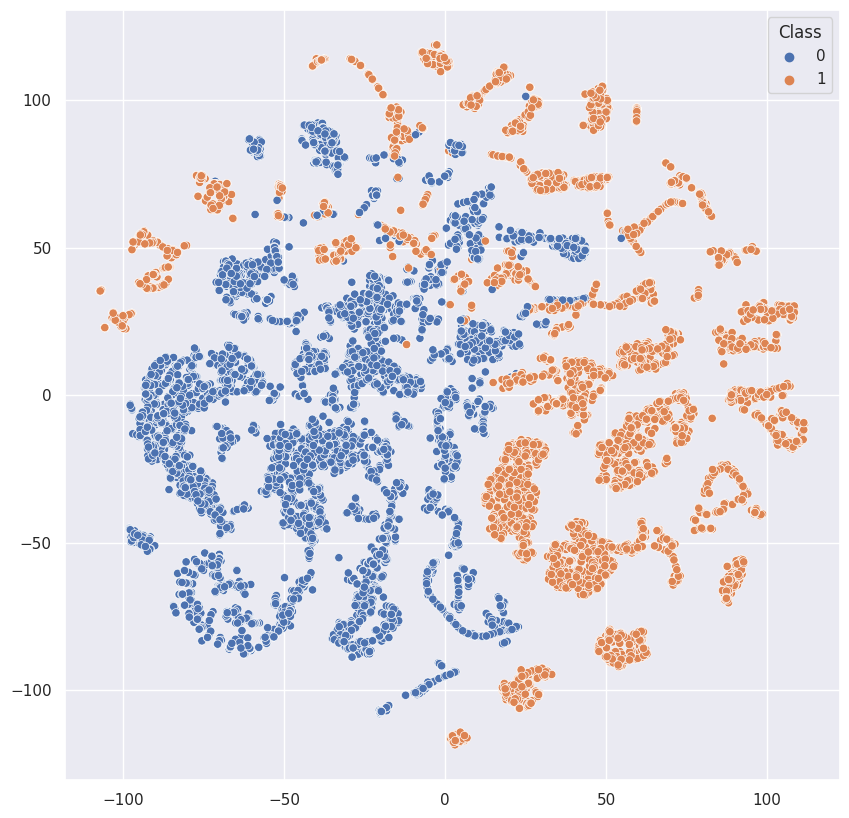

In [144]:
# Plotting TSNE of the train data
plot_tsne(X_train, y_train)

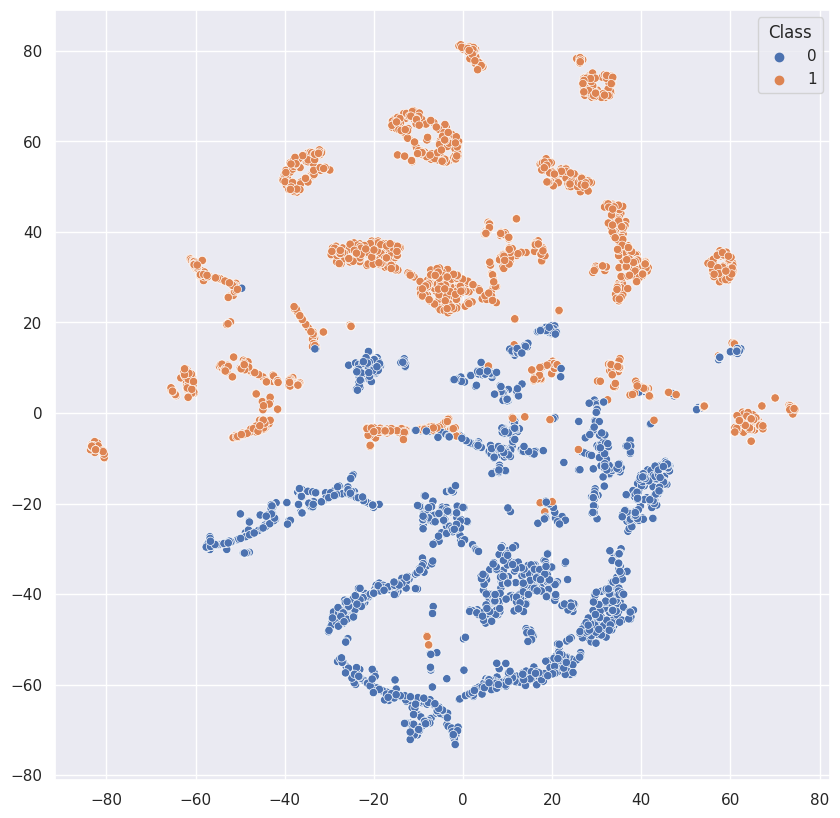

In [145]:
# Plotting TSNE of the test data
plot_tsne(X_test, y_test)

# 5. Models

In [18]:
def print_report(y_true, y_pred):
    """
    Print the classification report
    
    Parameters
    ----------
    y_true: array-like
        Actual values
    y_pred: array-like
        Predicted values
    """
    print(classification_report(y_true, y_pred, zero_division=0))

def plot_cm(y_true, y_pred):
    """
    Plot the confusion matrix
    
    Parameters
    ----------
    y_true: array-like
        Actual values
    y_pred: array-like
        Predicted values
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

def plot_roc_curve(y_true, y_pred):
    """
    Plot the ROC curve
    
    Parameters
    ----------
    y_true: array-like
        Actual values
    y_pred: array-like
        Predicted values
    """
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    roc_display.plot()

def get_results(y_true, y_pred):
    """
    Print the classification report and plot the confusion matrix
    
    Parameters
    ----------
    y_true: array-like
        Actual values
    y_pred: array-like
        Predicted values
    """
    print_report(y_true, y_pred)
    plot_cm(y_true, y_pred)
    plot_roc_curve(y_true, y_pred)
    plt.show()


## 5.1 XGBoost Classifier

In [252]:
xg_model = XGBClassifier(tree_method="hist",
                         objective="binary:logistic",
                         enable_categorical=True,
                         random_state=42)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2371
         1.0       1.00      1.00      1.00      2230

    accuracy                           1.00      4601
   macro avg       1.00      1.00      1.00      4601
weighted avg       1.00      1.00      1.00      4601



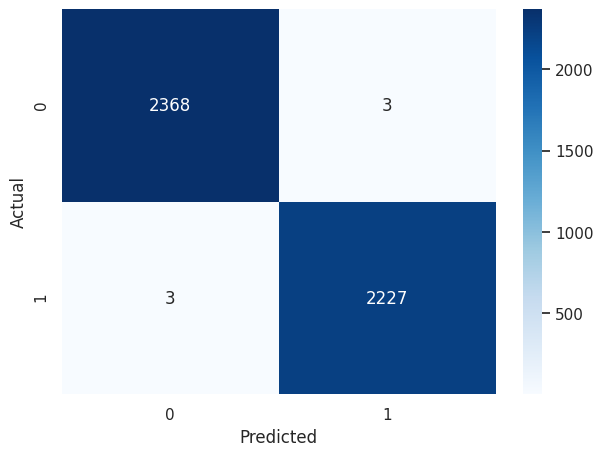

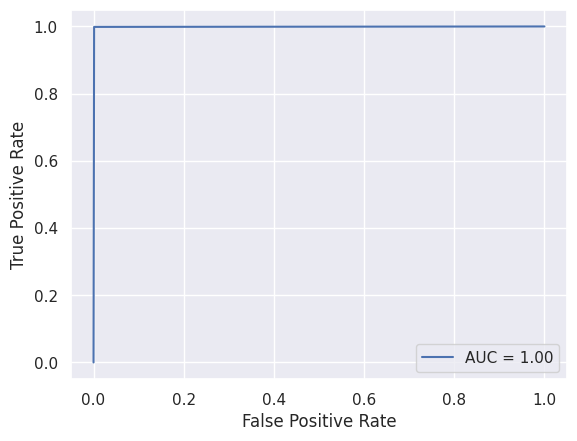

In [184]:
xg_y_pred = xg_model.predict(X_test)

get_results(y_test, xg_y_pred)

In [29]:
# Hyperparameter tuning for XGBoost
xg_model_tuned = XGBClassifier()

xg_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'gamma': [0, 1, 5]
}

xg_grid = GridSearchCV(xg_model_tuned, xg_params, cv=3, n_jobs=-1, verbose=1)
xg_grid.fit(X_train, y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


In [135]:
xg_grid.best_params_

NameError: name 'xg_grid' is not defined

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2371
         1.0       1.00      1.00      1.00      2230

    accuracy                           1.00      4601
   macro avg       1.00      1.00      1.00      4601
weighted avg       1.00      1.00      1.00      4601



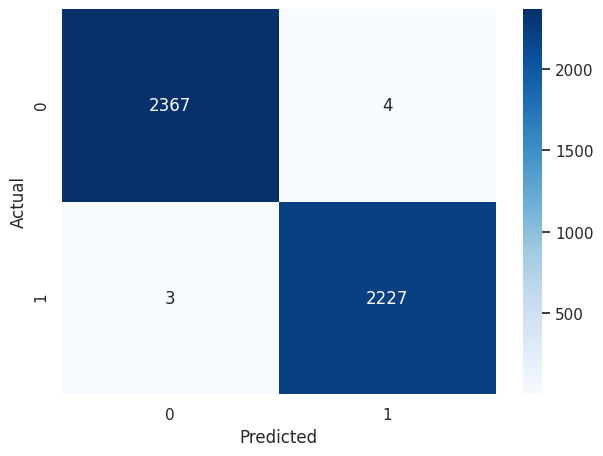

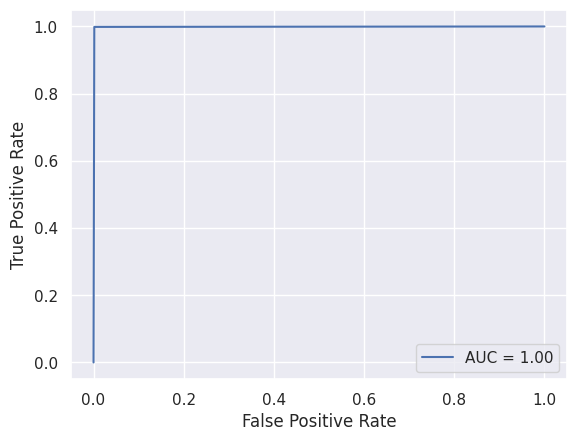

In [185]:
xg_best_params = {
    'colsample_bytree': 0.7,
    'gamma': 0,
    'learning_rate': 0.5,
    'max_depth': 7,
    'n_estimators': 100,
    'subsample': 1
}

xg_model_tuned = XGBClassifier(tree_method="hist",
                                enable_categorical=True,
                                objective="binary:logistic",
                                random_state=42,
                                **xg_best_params)
xg_model_tuned.fit(X_train, y_train)

xg_y_pred = xg_model_tuned.predict(X_test)

get_results(y_test, xg_y_pred)

## 5.2 CatBoost Classifier

In [222]:
cat_train = Pool(X_train, y_train, cat_features=cat_cols)
cat_test = Pool(X_test, y_test, cat_features=cat_cols)

In [230]:
cat_model = CatBoostClassifier(verbose=0,
                               cat_features=cat_cols,
                               iterations=2300,
                               learning_rate=0.01,
                               class_weights=[1, 40],
                               random_state=42)
cat_model.fit(cat_train)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2371
           1       0.98      1.00      0.99      2230

    accuracy                           0.99      4601
   macro avg       0.99      0.99      0.99      4601
weighted avg       0.99      0.99      0.99      4601



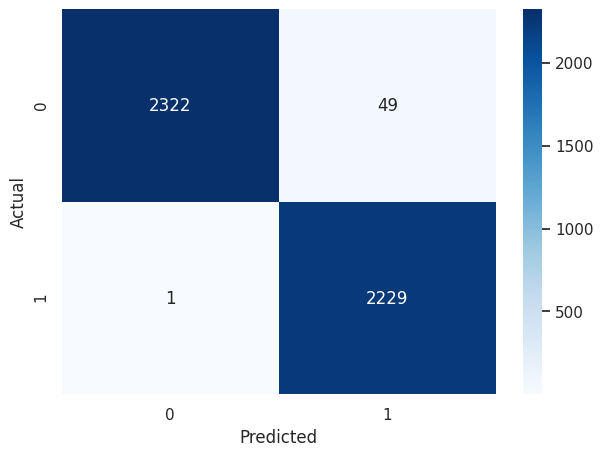

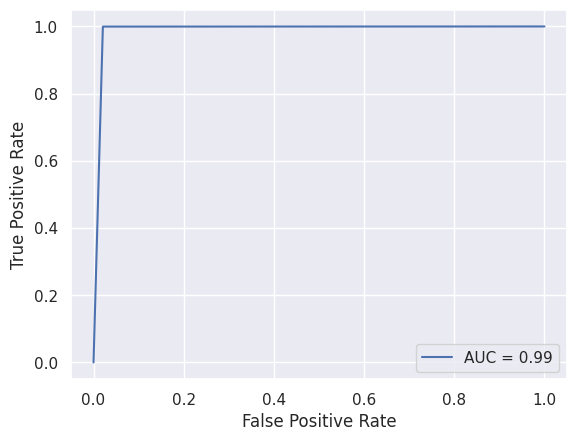

In [231]:
cat_y_pred = cat_model.predict(cat_test)

get_results(y_test, cat_y_pred)

In [155]:
# Hyperparameter tuning for CatBoost
cat_model_tuned = CatBoostClassifier(verbose=0,
                                    cat_features=cat_cols,
                                    random_state=42)

cat_params = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.3, 0.5],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

cat_grid = GridSearchCV(cat_model_tuned, cat_params, cv=3, n_jobs=-1, verbose=1)
cat_grid.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f8b1411fa30>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 7], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.1, 0.3, 0.5]},
             verbose=1)

In [163]:
cat_grid.best_params_

{'depth': 7, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2371
           1       0.98      1.00      0.99      2230

    accuracy                           0.99      4601
   macro avg       0.99      0.99      0.99      4601
weighted avg       0.99      0.99      0.99      4601



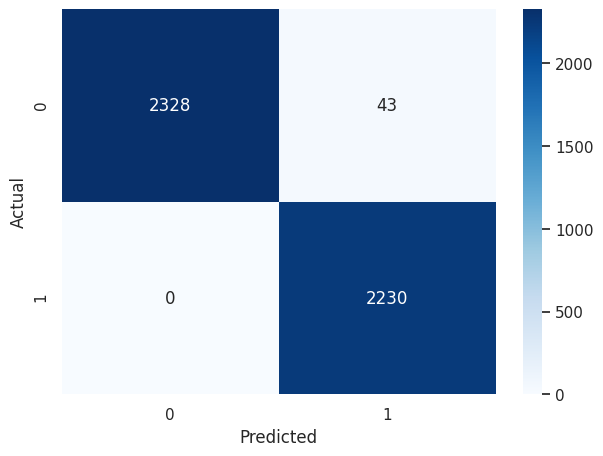

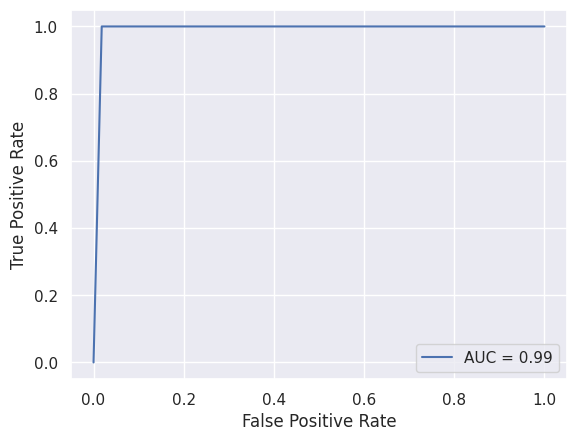

In [248]:
cat_best_params = {
    'depth': 7,
    'iterations': 300,
    'l2_leaf_reg': 3,
    'learning_rate': 0.1
}

cat_model_tuned = CatBoostClassifier(verbose=0, 
                                    cat_features=cat_cols,
                                    class_weights=[1, 40],
                                    random_state=42,
                                    **cat_best_params)
cat_model_tuned.fit(X_train, y_train)

cat_y_pred = cat_model_tuned.predict(X_test)

get_results(y_test, cat_y_pred)

## 5.3 LightGBM Classifier

In [243]:
lgbm_model = LGBMClassifier(class_weight={0: 1, 1: 40}, 
                            verbose=0)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(class_weight={0: 1, 1: 40}, verbose=0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2371
           1       1.00      1.00      1.00      2230

    accuracy                           1.00      4601
   macro avg       1.00      1.00      1.00      4601
weighted avg       1.00      1.00      1.00      4601



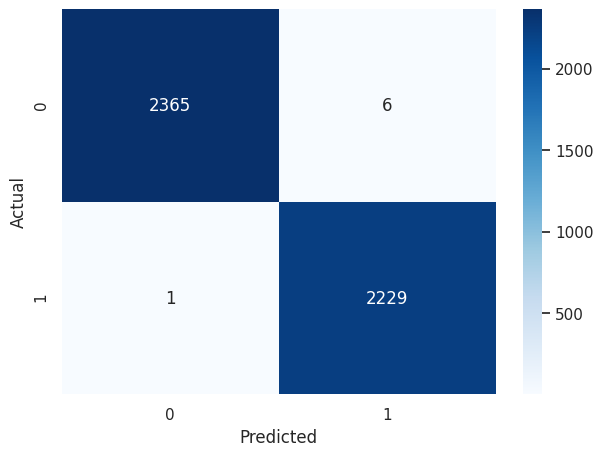

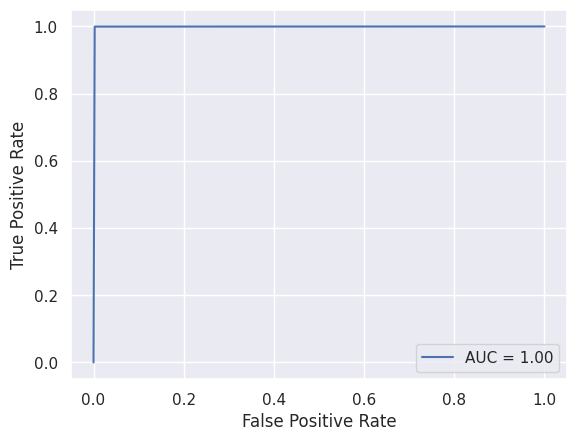

In [245]:
lgbm_y_pred = lgbm_model.predict(X_test)

get_results(y_test, lgbm_y_pred)

In [ ]:
# Hyperparameter tuning for LGBM
lgbm_model_tuned = LGBMClassifier()

lgbm_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 30, 40],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'reg_alpha': [0, 1, 5],
    'reg_lambda': [0, 1, 5]
}

lgbm_grid = GridSearchCV(lgbm_model_tuned, lgbm_params, cv=3, n_jobs=-1, verbose=1)
lgbm_grid.fit(X_train, y_train)

In [ ]:
lgbm_grid.best_params_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

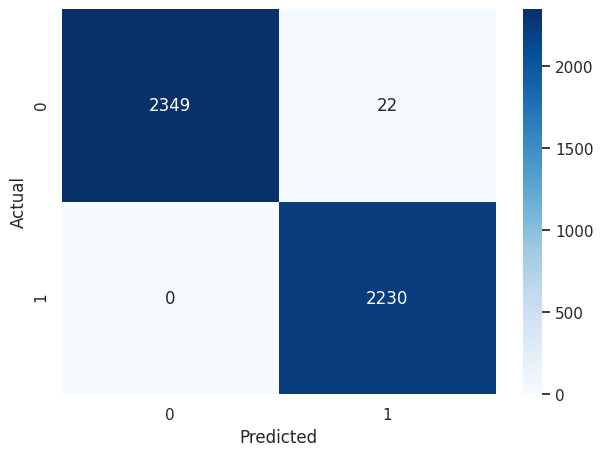

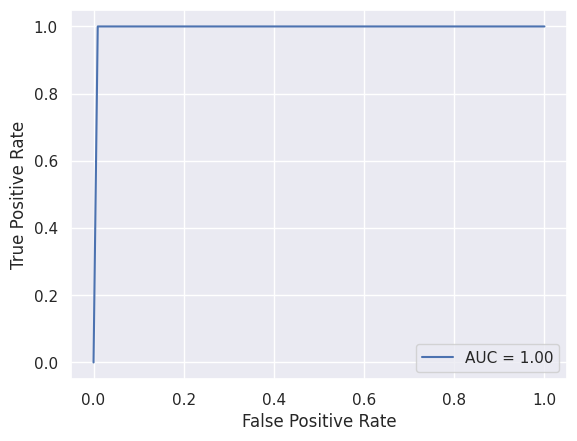

In [247]:
lggm_best_params = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'num_leaves': 30,
    'reg_alpha': 0,
    'reg_lambda': 0,
    'subsample': 1
}

lgbm_model_tuned = LGBMClassifier(class_weight={0: 1, 1: 40},
                                    verbose=0,
                                    **lggm_best_params, )
lgbm_model_tuned.fit(X_train, y_train)

lgbm_y_pred = lgbm_model_tuned.predict(X_test)

get_results(y_test, lgbm_y_pred)

##  5.4 SVM Classifier

In [21]:
svm_model = SVC(kernel='rbf',
                C=100,
                gamma=0.1,
                random_state=42)
svm_model.fit(X_train.select_dtypes(include=np.number), y_train)

SVC(C=100, gamma=0.1, random_state=42)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2371
           1       1.00      0.97      0.99      2230

    accuracy                           0.99      4601
   macro avg       0.99      0.99      0.99      4601
weighted avg       0.99      0.99      0.99      4601



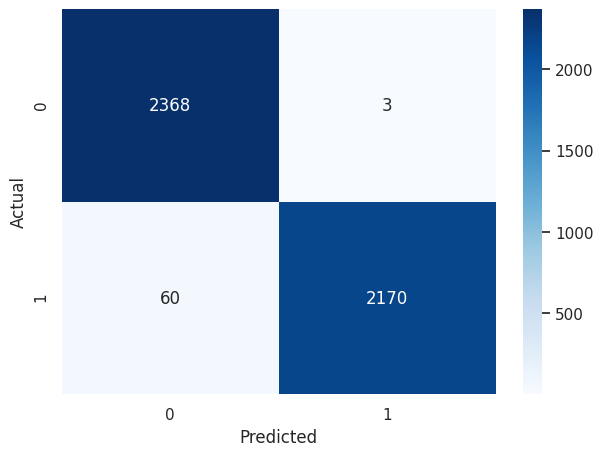

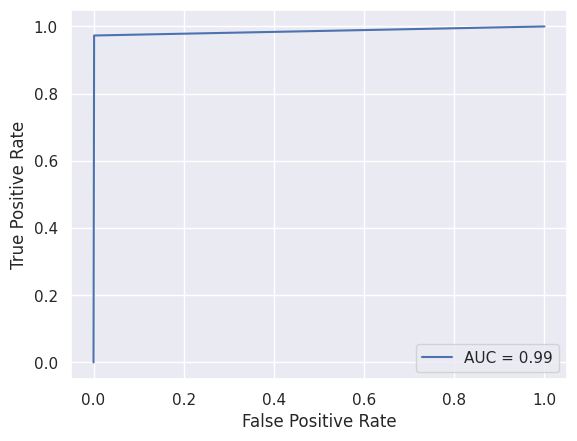

In [22]:
svm_y_pred = svm_model.predict(X_test.select_dtypes(include=np.number))
get_results(y_test, svm_y_pred)

In [99]:
# Hypertyining for SVM
svm_model = SVC(random_state=42)

svm_params = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

svm_grid = GridSearchCV(svm_model, 
                        svm_params, 
                        cv=3,
                        n_jobs=-1, 
                        verbose=1)
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=1)

In [100]:
svm_grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2371
           1       1.00      0.97      0.99      2230

    accuracy                           0.99      4601
   macro avg       0.99      0.99      0.99      4601
weighted avg       0.99      0.99      0.99      4601



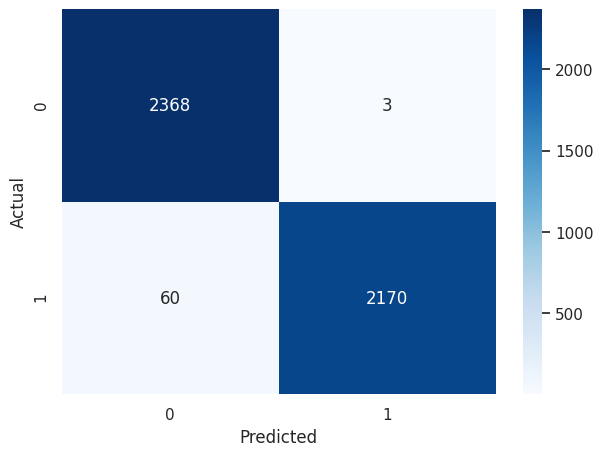

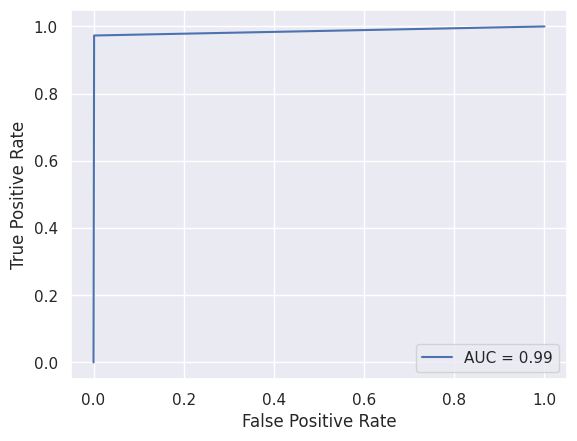

In [24]:
svm_best_params = {
    'C': 100,
    'gamma': 0.1,
    'kernel': 'rbf'
}

svm_model = SVC(**svm_best_params, 
                random_state=42)
svm_model.fit(X_train.select_dtypes(include=np.number), y_train)

svm_y_pred = svm_model.predict(X_test.select_dtypes(include=np.number))
get_results(y_test, svm_y_pred)

# 5.5 KNN Classifier

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train.select_dtypes(include=np.number), y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2371
           1       0.99      0.99      0.99      2230

    accuracy                           0.99      4601
   macro avg       0.99      0.99      0.99      4601
weighted avg       0.99      0.99      0.99      4601



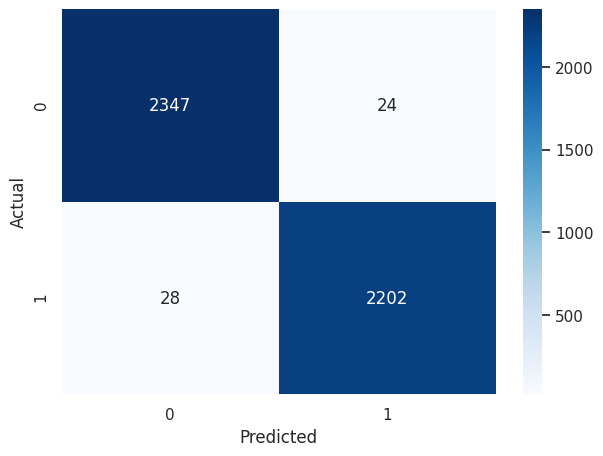

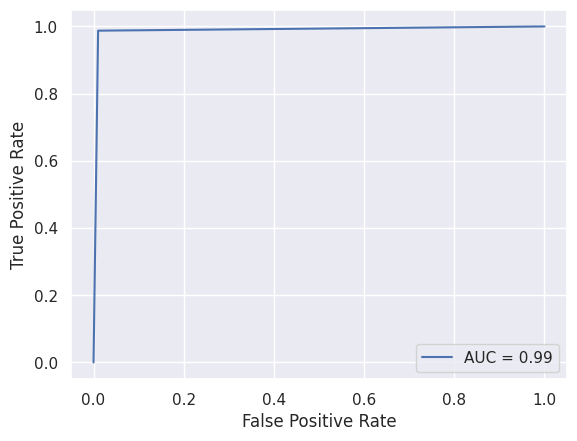

In [26]:
knn_y_pred = knn_model.predict(X_test.select_dtypes(include=np.number))
get_results(y_test, knn_y_pred)

## 5.6 Voting Classifier

In [93]:
vote_model = VotingClassifier([('xg', xg_model),
                                ('cat', cat_model),
                                ('lgbm', lgbm_model)
                                ],
                                voting='soft')
vote_model.fit(X_train, y_train)

VotingClassifier(estimators=[('xg',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.7,
                                            early_stopping_rounds=None,
                                            enable_categorical=True,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.5, max_bin=256,
                                            max_cat_threshold=64,
                                            max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=7,
                                            max_leaves=0, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=0, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7f8a860dd0f0>),
                             ('lgbm', LGBMClassifier(verbose=0))],
                 voting='soft')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2371
           1       1.00      1.00      1.00      2230

    accuracy                           1.00      4601
   macro avg       1.00      1.00      1.00      4601
weighted avg       1.00      1.00      1.00      4601



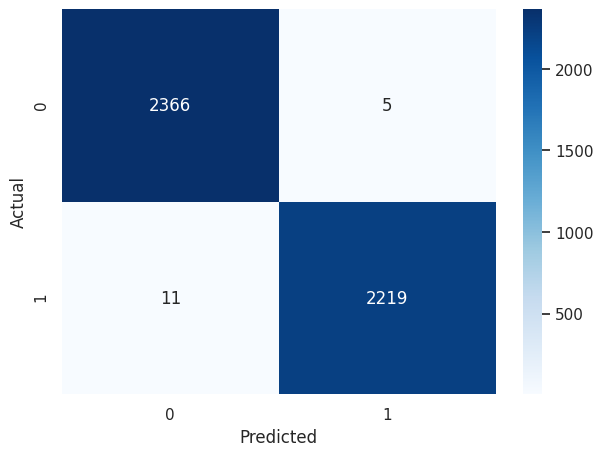

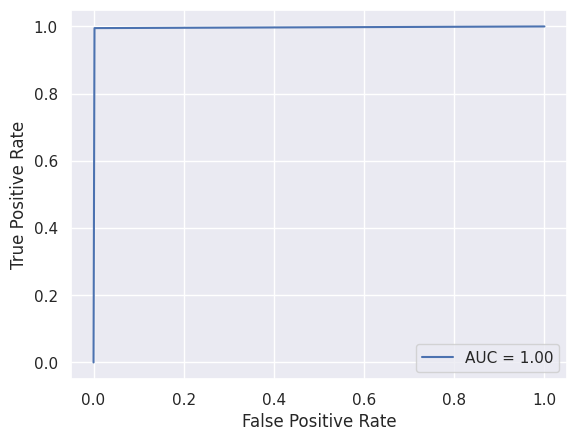

In [94]:
vote_y_pred = vote_model.predict(X_test)
get_results(y_test, vote_y_pred)

## 5.7 MLP Classifier

In [96]:
# Prepare the data for the MLP
data_mlp, benchmark_mlp = process_data(data, benchmark, process_cat=True)

In [255]:
mlp_X_train, mlp_X_test, mlp_y_train , mlp_y_test = train_test_split(data_mlp, 
                                                    data["Class"], 
                                                    test_size=0.2, 
                                                    stratify=data["protocol_type"],
                                                    random_state=42)

In [258]:
mlp_model = Sequential([
    Dense(256, activation='relu', input_shape=(mlp_X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

mlp_model.fit(mlp_X_train, 
              mlp_y_train, 
              epochs=50, 
              batch_size=200, 
              validation_split=0.2, 
              class_weight={0: 1, 1: 40})

Epoch 1/50


/home/medhat/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


74/74 [==============================] - 1s 8ms/step - loss: 2.1660 - accuracy: 0.5458 - val_loss: 0.4684 - val_accuracy: 0.8555
Epoch 2/50
74/74 [==============================] - 0s 6ms/step - loss: 0.2691 - accuracy: 0.9440 - val_loss: 0.0902 - val_accuracy: 0.9818
Epoch 3/50
74/74 [==============================] - 0s 6ms/step - loss: 0.2015 - accuracy: 0.9772 - val_loss: 0.0758 - val_accuracy: 0.9840
Epoch 4/50
74/74 [==============================] - 0s 6ms/step - loss: 0.0957 - accuracy: 0.9815 - val_loss: 0.0805 - val_accuracy: 0.9818
Epoch 5/50
74/74 [==============================] - 0s 6ms/step - loss: 0.0851 - accuracy: 0.9837 - val_loss: 0.0522 - val_accuracy: 0.9889
Epoch 6/50
74/74 [==============================] - 0s 6ms/step - loss: 0.0719 - accuracy: 0.9856 - val_loss: 0.0484 - val_accuracy: 0.9883
Epoch 7/50
74/74 [==============================] - 0s 6ms/step - loss: 0.0584 - accuracy: 0.9897 - val_loss: 0.0518 - val_accuracy: 0.9886
Epoch 8/50
74/74 [=============

144/144 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2371
           1       0.99      1.00      1.00      2230

    accuracy                           1.00      4601
   macro avg       1.00      1.00      1.00      4601
weighted avg       1.00      1.00      1.00      4601



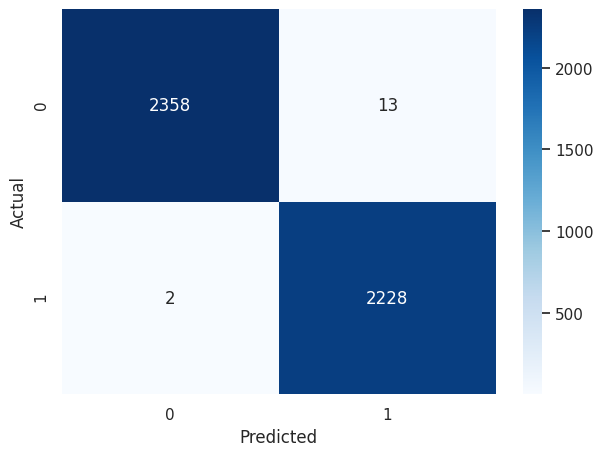

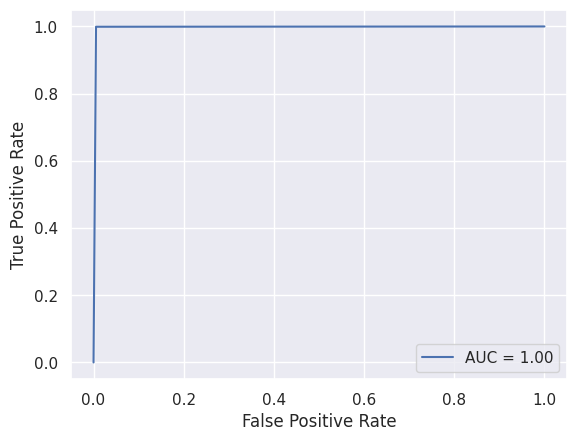

In [259]:
mlp_y_pred = mlp_model.predict(mlp_X_test)
mlp_y_pred = np.where(mlp_y_pred > 0.5, 1, 0)

get_results(mlp_y_test, mlp_y_pred)

# 6. Predictions

I'll use the CatBoost and ANN models to make predictions on the benchmark set.

In [ ]:
mlp_y_benchmark = mlp_model.predict(benchmark_mlp)
mlp_y_benchmark = np.where(mlp_y_benchmark > 0.5, 1, 0).flatten()

Counter(mlp_y_benchmark)

704/704 [==============================] - 1s 2ms/step


Counter({0: 10996, 1: 11505})

In [ ]:
y_cat_benchmark = cat_model.predict(benchmark_prep)

Counter(y_cat_benchmark)

Counter({1: 12411, 0: 10090})

In [236]:
y_benchmark = mlp_model.predict(benchmark_mlp)
y_benchmark = np.where(y_benchmark > 0.5, 1, 0).flatten()

benchmark['Class'] = y_benchmark

(
    benchmark
    .rename_axis('ID')
    [['Class']]
    .to_csv('benchmark_result.csv')
)

704/704 [==============================] - 1s 1ms/step


In [237]:
y_benchmark = cat_model.predict(benchmark_prep)

benchmark['Class'] = y_benchmark

(
    benchmark
    .rename_axis('ID')
    [['Class']]
    .to_csv('benchmark_result.csv')
)

CatBoost seemed to have the better performance and the class wight parameter helped to improve the recall of the attack class.

I'll train it again on the whole dataset and make predictions on the benchmark set.

In [266]:
cat_model = CatBoostClassifier(verbose=0,
                                 cat_features=cat_cols,
                                 iterations=2500,
                                 learning_rate=0.01,
                                 class_weights=[1, 40],
                                 random_state=42)

cat_model.fit(data_prep, data['Class'])

In [268]:
y_cat_benchmark = cat_model.predict(benchmark_prep)

Counter(y_cat_benchmark)

Counter({1: 12528, 0: 9973})

In [269]:
y_benchmark = cat_model.predict(benchmark_prep)

benchmark['Class'] = y_benchmark

(
    benchmark
    .rename_axis('ID')
    [['Class']]
    .to_csv('benchmark_result.csv')
)